In [1]:
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()

df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

df.head(n=10)   

/home/mahesh/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/home/mahesh/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datas

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [2]:
df.shape

(506, 14)

In [3]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'MEDV']
y = df.loc[:, df.columns == 'MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [4]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(Dense(64, activation='relu', name='dense_2'))
model.add(Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

2024-04-21 23:19:36.510691: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-21 23:19:36.511331: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 23:19:36.518527: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-21 23:19:36.567289: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-21 23:19:37.324728: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_output (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,113 (39.50 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 666.8823 - mae: 23.8495 - val_loss: 603.1140 - val_mae: 22.6078
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 546.7490 - mae: 21.5052 - val_loss: 543.0257 - val_mae: 21.1857
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 470.4359 - mae: 19.7047 - val_loss: 449.5680 - val_mae: 18.7324
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 402.8693 - mae: 17.3997 - val_loss: 322.5546 - val_mae: 14.8032
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 260.6205 - mae: 13.0793 - val_loss: 197.5501 - val_mae: 10.2733
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 164.9526 - mae: 10.1115 - val_loss: 138.8711 - val_mae: 8.5546
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 154.5818 - mae: 9.6421 - val_loss: 124.4475 - val_mae: 8.1390
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.1786 - mae: 8.6537 - val_loss: 115.6169 - val_mae: 7.6898
Epoch 9/100
11/11 ━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.3530 - mae: 2.8888 - val_loss: 32.2156 - val_mae: 3.6824
Epoch 55/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15.3717 - mae: 2.6706 - val_loss: 30.7393 - val_mae: 3.6143
Epoch 56/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.5789 - mae: 2.8879 - val_loss: 31.7316 - val_mae: 3.6199
Epoch 57/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.0110 - mae: 2.5596 - val_loss: 29.9197 - val_mae: 3.5440
Epoch 58/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.4506 - mae: 3.0196 - val_loss: 30.8306 - val_mae: 3.5621
Epoch 59/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.2930 - mae: 2.4685 - val_loss: 29.4623 - val_mae: 3.4853
Epoch 60/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.1248 - mae: 2.6226 - val_loss: 29.6132 - val_mae: 3.4753
Epoch 61/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.7636 - mae: 2.6578 - val_loss: 29.2393 - val_mae: 3.4523
Epoch 62/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [9]:
import seaborn as sns

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step


NameError: name 'plt' is not defined

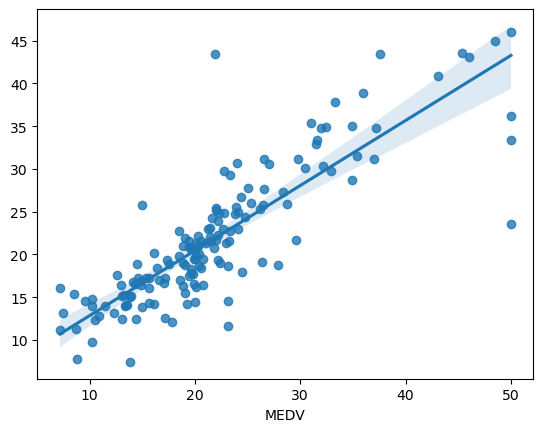

In [10]:
y_pred = model.predict(X_test)

sns.regplot(x=y_test, y=y_pred)
plt.title("Regression line")
plt.show()

In [7]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30.4546 - mae: 3.4332 
Mean squared error on test data:  22.4675235748291
Mean absolute error on test data:  3.1079490184783936
